In [33]:
import importlib.util
import numpy as np
from scipy.constants import c
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [34]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

interApi = lumapi.INTERCONNECT(hide = False)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [35]:
um = 1e-6
nm = 1e-9
valor_lambda = 1550*nm
start_wavelenth = 1500*nm
stop_wavelenth = 1600*nm
number_point = 100000

neff = 2.35317

file = 'MZI_Ideal'

In [36]:
ng = 4.3458796
FSR = [1*nm, 10*nm, 20*nm]

L1 = [110*um, 110*um, 110*um]
L2 = np.zeros(len(FSR))

for i in range (len(FSR)):
    d_L = valor_lambda**2/(ng*FSR[i])
    L2[i] = L1[i] + d_L

    print(f'\u0394L = {d_L/um:.2f}\u03BCm\nComprimento maior = {L2[i]/um:.2f}\u03BCm\nComprimento menor = {L1[i]/um:.2f}\u03BCm\n')

ΔL = 552.82μm
Comprimento maior = 662.82μm
Comprimento menor = 110.00μm

ΔL = 55.28μm
Comprimento maior = 165.28μm
Comprimento menor = 110.00μm

ΔL = 27.64μm
Comprimento maior = 137.64μm
Comprimento menor = 110.00μm



In [37]:
Lv = np.zeros(len(FSR))
radiu = 5*um

for i in range (len(FSR)):
    Lv[i] = (L2[i] - 4*(L1[i]-4*radiu)/3)/2

    print(f'Comprimento horizontal = {((L1[i]-4*radiu)/3)/um:.2f}\u03BCm\nComprimento do raio = {radiu/um:.2f}\u03BCm\nComprimento vertical = {Lv[i]/um:.2f}\u03BCm\n')

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 271.41μm

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 22.64μm

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 8.82μm



In [38]:
x_ona = 0
y_ona = 0

x_waveguide_maior = 25
y_waveguide_maior = 150

x_waveguide_menor = 25
y_waveguide_menor = 300

x_y_branch = -150
y_y_branch = 225

x_acoplador_direcional = 300
y_acoplador_direcional = 225

In [39]:
interApi.switchtolayout()

interApi.select('ONA')
interApi.delete()

interApi.addelement('Optical Network Analyzer')
interApi.set('name', 'ONA')
interApi.setposition('ONA', x_ona, y_ona)
interApi.set('number of input ports', 2)
interApi.set('input parameter', 'start and stop')
interApi.set('start frequency', c/start_wavelenth)
interApi.set('stop frequency', c/stop_wavelenth)
interApi.set('number of points', number_point)

In [40]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.delete()
interApi.select('WGD_menor')
interApi.delete()

interApi.addelement('Straight Waveguide')
interApi.set('name', 'WGD_maior')
interApi.setposition('WGD_maior', x_waveguide_maior, y_waveguide_maior)
interApi.set('length', L2[2])
interApi.set('effective index 1', neff)
interApi.set('group index 1', ng)

interApi.addelement('Straight Waveguide')
interApi.set('name', 'WGD_menor')
interApi.setposition('WGD_menor', x_waveguide_menor, y_waveguide_menor)
interApi.set('length', L1[2])
interApi.set('effective index 1', neff)
interApi.set('group index 1', ng)

In [41]:
interApi.switchtolayout()

interApi.select('Y_Branch')
interApi.delete()

interApi.addelement('Waveguide Y Branch')
interApi.set('name', 'Y_Branch')
interApi.setposition('Y_Branch', x_y_branch, y_y_branch)

In [42]:
interApi.switchtolayout()

interApi.select('Acoplador_Direcional')
interApi.delete()

interApi.addelement('Waveguide Coupler')
interApi.set('name', 'Acoplador_Direcional')
interApi.setposition('Acoplador_Direcional', x_acoplador_direcional, y_acoplador_direcional)

In [43]:
interApi.connect('ONA', 'output', 'Y_Branch', 'port 1')
interApi.connect('Y_Branch', 'port 2', 'WGD_maior', 'port 1')
interApi.connect('Y_Branch', 'port 3', 'WGD_menor', 'port 1')
interApi.connect('WGD_maior', 'port 2', 'Acoplador_Direcional', 'port 1')
interApi.connect('WGD_menor', 'port 2', 'Acoplador_Direcional', 'port 2')
interApi.connect('Acoplador_Direcional', 'port 3', 'ONA', 'input 1')
interApi.connect('Acoplador_Direcional', 'port 4', 'ONA', 'input 2')

1.0

In [44]:
interApi.save(file)

In [45]:
interApi.run(1)

In [46]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1['TE gain (dB)'])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2['TE gain (dB)'])  


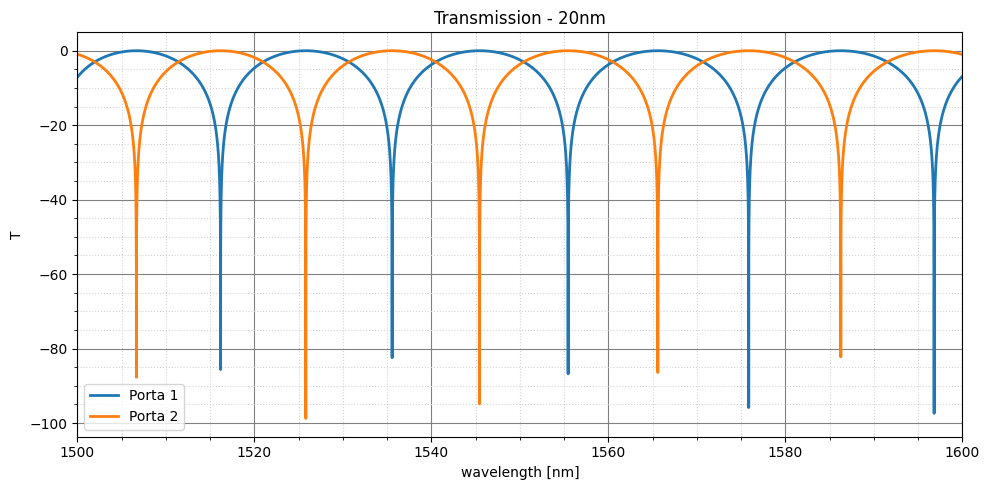

In [47]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Transmission - 20nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 20nm.png')
plt.show()

In [48]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_20 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_20 = np.array(FSR_1["TE free spectral range (m)"])

wavelength_2_20 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_20 = np.array(FSR_2["TE free spectral range (m)"]) 

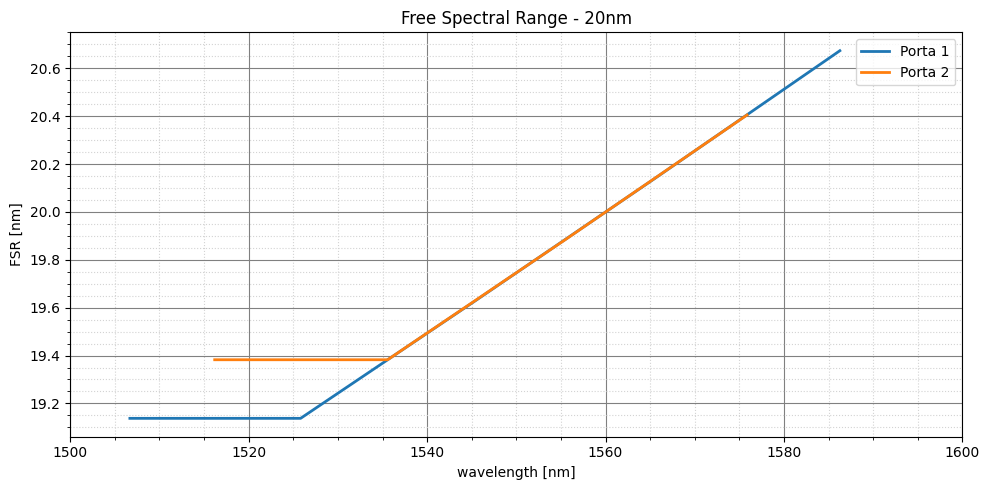

In [49]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1_20/nm, fsrplot_1_20/nm, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2_20/nm, fsrplot_2_20/nm, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range - 20nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 20nm.png')
plt.show()

In [50]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.set('length', L2[1])
interApi.select('WGD_menor')
interApi.set('length', L1[1])

In [51]:
interApi.save(file)

In [52]:
interApi.run(1)

In [53]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1['TE gain (dB)'])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2['TE gain (dB)'])  

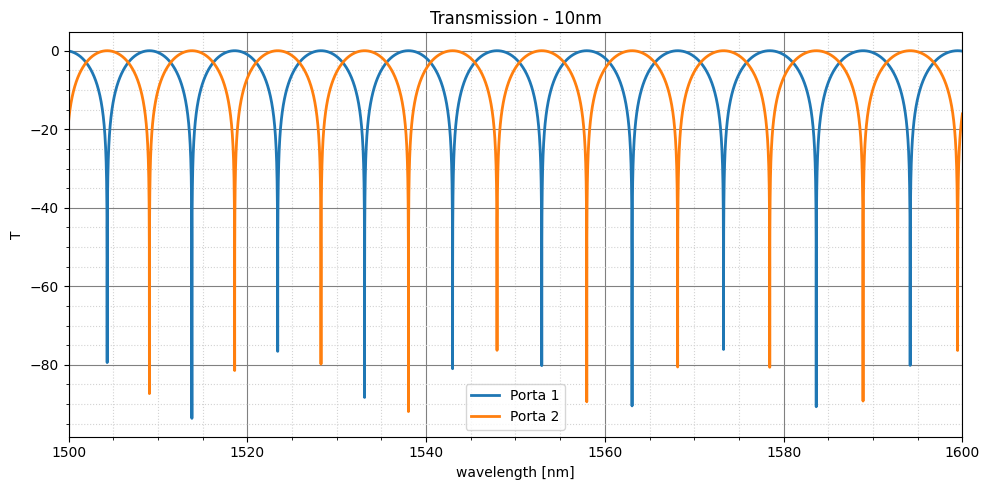

In [54]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Transmission - 10nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 10nm.png')
plt.show()

In [55]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_10 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_10 = np.array(FSR_1["TE free spectral range (m)"])

wavelength_2_10 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_10 = np.array(FSR_2["TE free spectral range (m)"]) 

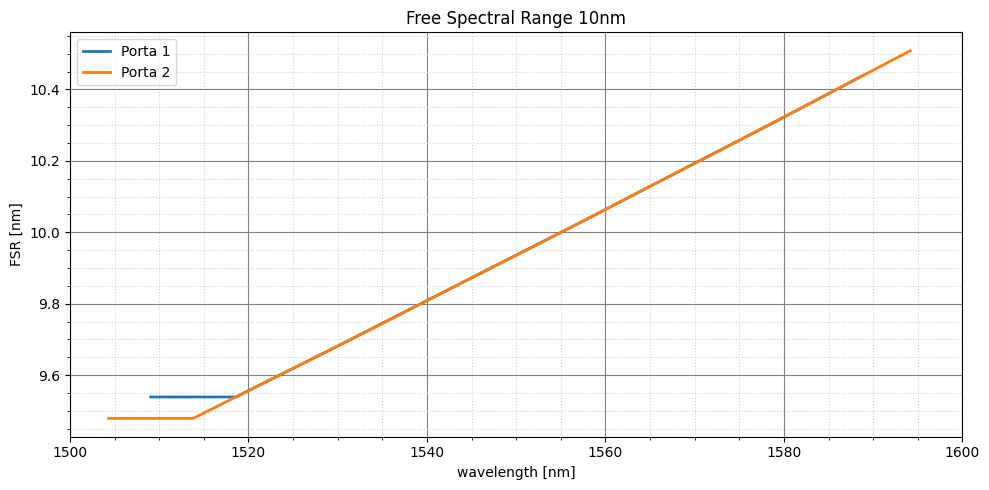

In [56]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)

plt.plot(wavelength_1_10/nm, fsrplot_1_10/nm, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2_10/nm, fsrplot_2_10/nm, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range 10nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 10nm.png')
plt.show()

In [57]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.set('length', L2[0])
interApi.select('WGD_menor')
interApi.set('length', L1[0])

In [58]:
interApi.save(file)

In [59]:
interApi.run(1)

In [60]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1['TE gain (dB)'])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2['TE gain (dB)'])  

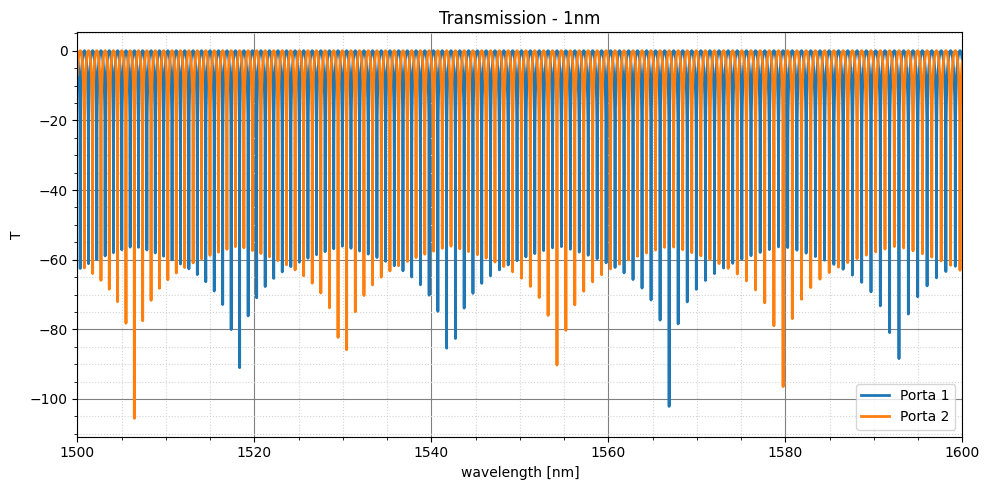

In [61]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Transmission - 1nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 1nm.png')
plt.show()

In [62]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_1 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_1 = np.array(FSR_1["TE free spectral range (m)"])

wavelength_2_1 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_1 = np.array(FSR_2["TE free spectral range (m)"])  

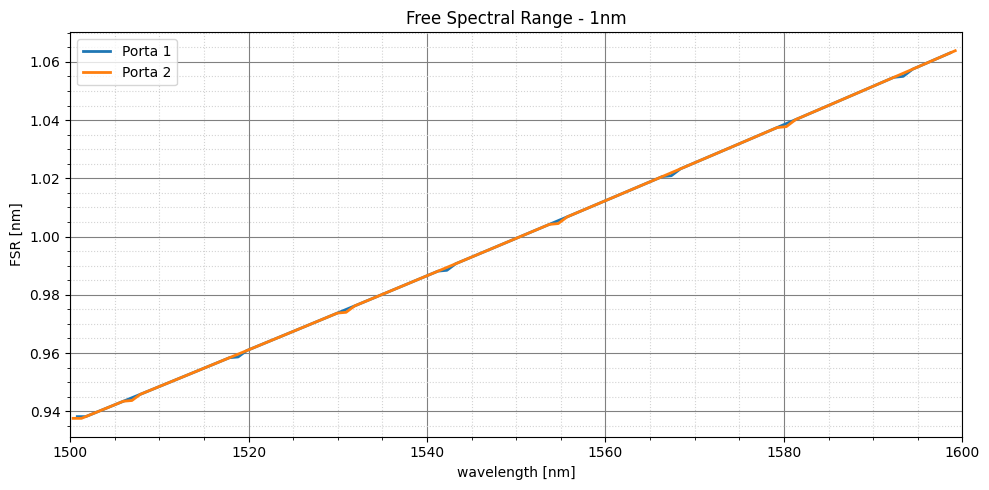

In [63]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)

plt.plot(wavelength_1_1/nm, fsrplot_1_1/nm, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2_1/nm, fsrplot_2_1/nm, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range - 1nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 1nm.png')
plt.show()

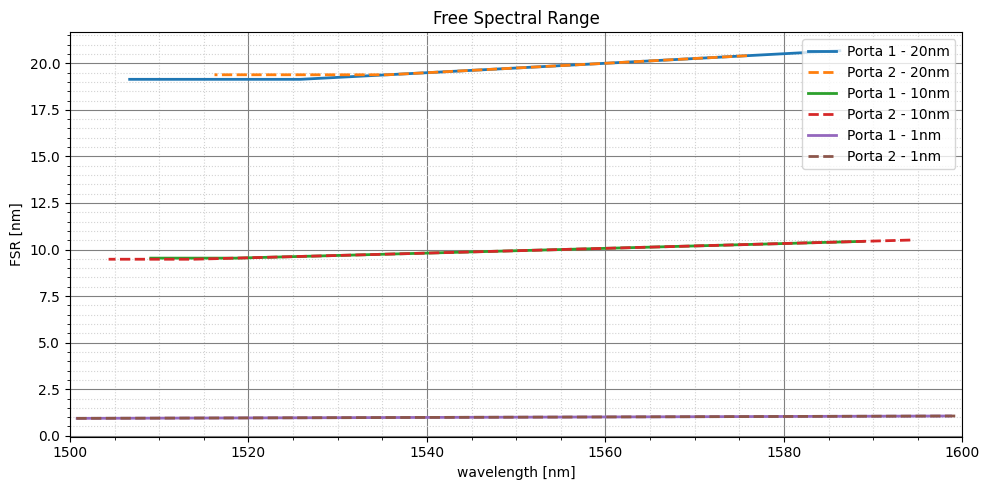

In [64]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)

plt.plot(wavelength_1_20/nm, fsrplot_1_20/nm, label = 'Porta 1 - 20nm', linewidth=2)
plt.plot(wavelength_2_20/nm, fsrplot_2_20/nm, label = 'Porta 2 - 20nm', linewidth=2, linestyle='--')
plt.plot(wavelength_1_10/nm, fsrplot_1_10/nm, label = 'Porta 1 - 10nm', linewidth=2)
plt.plot(wavelength_2_10/nm, fsrplot_2_10/nm, label = 'Porta 2 - 10nm', linewidth=2, linestyle='--')
plt.plot(wavelength_1_1/nm, fsrplot_1_1/nm, label = 'Porta 1 - 1nm', linewidth=2)
plt.plot(wavelength_2_1/nm, fsrplot_2_1/nm, label = 'Porta 2 - 1nm', linewidth=2, linestyle='--')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR.png')
plt.show()